In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font size = 6>Step 1) Load already cleaned data</font>

In [10]:
df = pd.read_csv("Cleaned_layoffs.csv")
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added,funds_raised_clean,year,month,quarter,estimated_company_size,company_size_category
0,Atlassian,"Sydney,Non-U.S.",150.0,2025-07-30,NaN,Other,https://au.finance.yahoo.com/news/atlassian-bi...,Post-IPO,$210,Australia,2025-07-30,210.0,2025,7,2025Q3,NaN,Unknown
1,Krutrim,"Bengaluru,Non-U.S.",100.0,2025-07-28,NaN,AI,https://inc42.com/buzz/krutrim-lays-off-over-1...,Unknown,$304,India,2025-07-30,304.0,2025,7,2025Q3,NaN,Unknown
2,Eyeo,"Cologne,Non-U.S.",NaN,2025-07-28,40.0,NaN,https://www.adexchanger.com/privacy/eyeo-names...,Unknown,NaN,Germany,2025-07-30,NaN,2025,7,2025Q3,NaN,Unknown
3,Ohm Mobility,Bengaluru,NaN,2025-07-24,100.0,Transportation,https://entrackr.com/snippets/ev-financing-sta...,Seed,NaN,India,2025-07-26,NaN,2025,7,2025Q3,NaN,Unknown
4,Tipalti,SF Bay Area,NaN,2025-07-24,NaN,Finance,https://www.calcalistech.com/ctechnews/article...,Series F,$565,United States,2025-07-26,565.0,2025,7,2025Q3,NaN,Unknown
5,WiseTech,"Sydney,Non-U.S.",NaN,2025-07-23,NaN,Logistics,https://www.reuters.com/world/asia-pacific/aus...,Post-IPO,$3000,Australia,2025-07-24,3000.0,2025,7,2025Q3,NaN,Unknown
6,ConsenSys,New York City,47.0,2025-07-22,7.0,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,$726,United States,2025-07-22,726.0,2025,7,2025Q3,671.0,Mid (500–4999)
7,Zeen,SF Bay Area,NaN,2025-07-21,100.0,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,$9,United States,2025-07-22,9.0,2025,7,2025Q3,NaN,Unknown
8,Rocket Companies,Detroit,NaN,2025-07-18,2.0,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,$5200,United States,2025-07-22,5200.0,2025,7,2025Q3,NaN,Unknown
9,Amazon,Seattle,NaN,2025-07-17,NaN,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,$8100,United States,2025-07-18,8100.0,2025,7,2025Q3,NaN,Unknown


<font size = 6><b>Step 2) Begining Analysis of Cleaned Data</b></font>

Since this Data is encompassing a large amount of raw information, spanning from 2020 to 2025, we can draw many conclusion from it. Due to the high number of volatile situtaions that arose in that time, technical companies hired and laid off employees according to a number of factors.

I am using the standard analyses first, before moving onto more complex ones as we go further. 



<font size = 6><b><u>A: Standard Analyses</u></b></font>

<font size=4><b>1: Quaterly Layoff</b></font> — Reveals consice, condensed way of viewing data at an initial glance

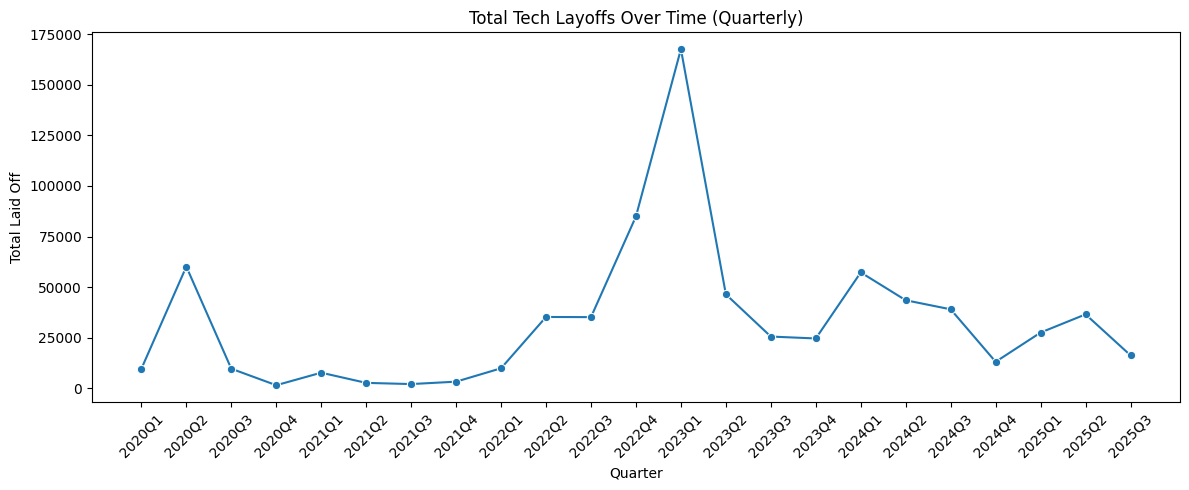

In [14]:
df['quarter'] = df['date'].dt.to_period('Q')

# Group by quarter
quarterly = df.groupby('quarter')['total_laid_off'].sum().reset_index()
quarterly['quarter'] = quarterly['quarter'].astype(str)

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=quarterly, x='quarter', y='total_laid_off', marker='o')
plt.title("Total Tech Layoffs Over Time (Quarterly)")
plt.xlabel("Quarter")
plt.ylabel("Total Laid Off")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font size = 4><b>Observation:</b></font>
- Layoffs spiked significantly in Q2 2020 (COVID wave), then again in Q4 2022 (global tech correction).
- The peak quarters correspond closely with macroeconomic downturns.
- Since mid-2023, layoff counts appear to stabilize, though remain higher than pre-COVID levels.

<font size=4><b>2: Top 10 Industries</b></font> — Reveals Industries that were hit the hardest, Sector Wise impact.

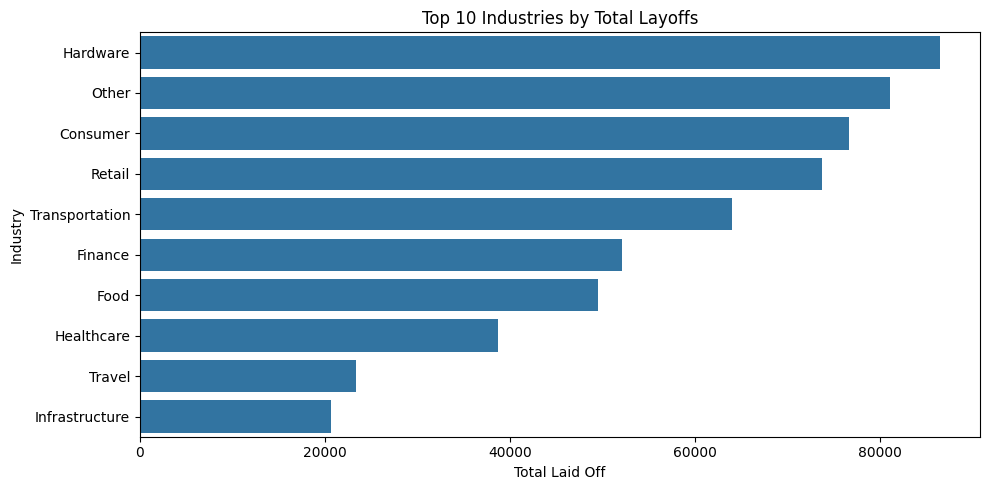

In [15]:
top_industries = (
    df.groupby('industry')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title("Top 10 Industries by Total Layoffs")
plt.xlabel("Total Laid Off")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


#### **Conclusion:**

- The chart reveals which industries experienced the highest total layoffs from 2020 to 2025.
- Unsurprisingly, Hardware industry was hit the hardest, considering the Lockdowns imposed globally, as well as the implementation of widescale AI tools post-pandemic
- Industries like Consumer, Retail, and Finance also top the list — these sectors are highly sensitive to economic cycles and investor sentiment.
- The Technology industry also appears prominently, reflecting the broader tech correction post-2022.
- Interestingly, sectors like Logistics and Healthcare Tech, which saw growth during the pandemic, also experienced significant layoffs, thus indicating possible over-hiring or post-pandemic contraction.
- This breakdown helps pinpoint which sectors may require more stable workforce planning or risk mitigation strategies during market turbulence.


<font size=4><b>3: Geographic Conditions</b></font> — Was any particular geographic region/regions hit harder than the rest? If so, why?

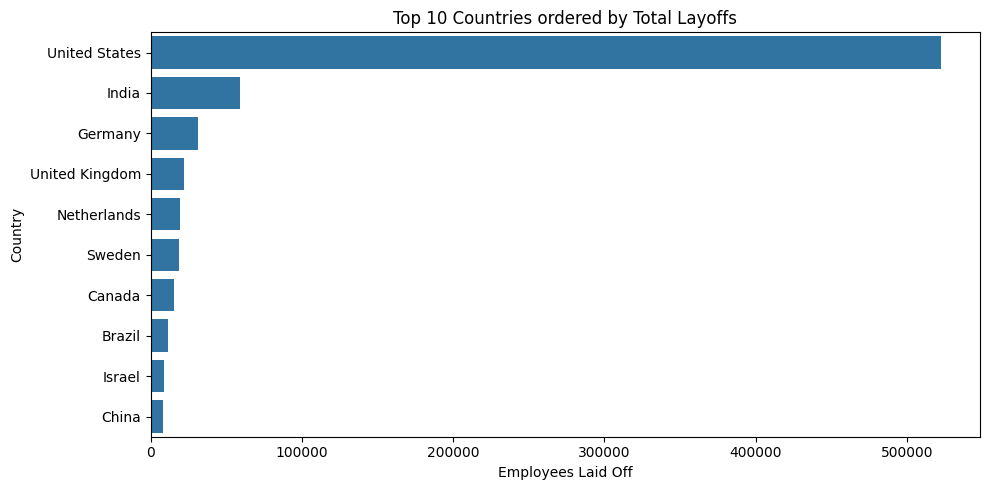

In [16]:
top_countries = (
    df.groupby('country')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries ordered by Total Layoffs")
plt.xlabel("Employees Laid Off")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


<font size = 4><b>Conclusion:</b></font>

- The United States had the highest number of tech layoffs by far — with approximately 7 times more layoffs than the second-place country, India. More than half a million in United States compared to less than a Hundred thousand in India.
- This is not surprising, as the U.S. has the largest concentration of tech companies, especially in Silicon Valley, and a strong culture of reporting workforce changes.
- India and China follow, likely reflecting the rapid growth of tech ecosystems in these regions — but their reported layoff counts are significantly smaller in comparison.
- This disparity also suggests potential underreporting from some regions or different layoff disclosure norms.
- The dominance of layoffs in developed economies suggests the global tech contraction was not evenly distributed.
- Overall, the layoff landscape is heavily skewed toward U.S.-based companies, shaping the global perception of the tech downturn.

<font size = 4><b> 4: Industry Size </b></font> — To know which scale of company laid off more than the others? Small, Medium or Large?

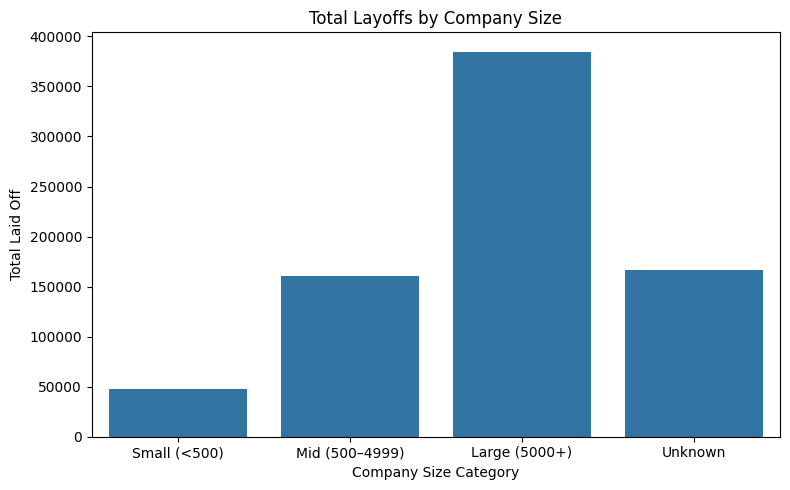

In [18]:
order = ['Small (<500)', 'Mid (500–4999)', 'Large (5000+)', 'Unknown']
size_totals = (
    df.groupby('company_size_category')['total_laid_off']
    .sum()
    .reindex(order)
)

plt.figure(figsize=(8, 5))
sns.barplot(x=size_totals.index, y=size_totals.values)
plt.title("Total Layoffs by Company Size")
plt.xlabel("Company Size Category")
plt.ylabel("Total Laid Off")
plt.tight_layout()
plt.show()


<font size = 4><b>Conclusion:</b></font>

- Large companies (5000+ employees) accounted for the highest number of total layoffs, significantly more than any other category.
- There is a sharp drop (~50% decrease) between <b>Large</b> and <b>Medium</b> companies, indicating that big tech drove the majority of total layoffs.
- <b>Small</b> companies come in second, suggesting that while they lay off fewer people per company, their collective impact is notable.
- The <b>Unknown</b> category shows a total layoff count roughly equal to the mid-sized companies — reinforcing the importance of clean data for deeper workforce analysis.
- Overall, the chart confirms that <b>Large corporations</b> — likely those undergoing cost restructuring — were the primary contributors to headline-making layoff events.

<font size = 4><b> 5: Layoff Percentage by Company Size</b></font> — Reveals organizational strain instead of just raw numbers. Which scale removed most number per employee count.

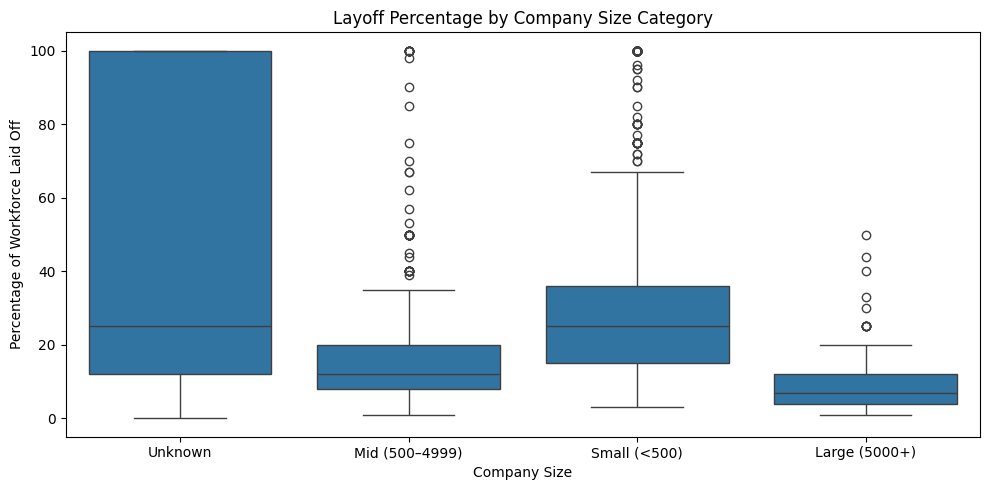

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='company_size_category', y='percentage_laid_off')
plt.title("Layoff Percentage by Company Size Category")
plt.xlabel("Company Size")
plt.ylabel("Percentage of Workforce Laid Off")
plt.tight_layout()
plt.show()


<font size = 4><b>Conclusion:</b></font>

- Small companies have the highest median layoff percentage — more than double that of large firms and significantly higher than mid-sized companies.
- This suggests that when small companies do lay off employees, they often cut deeply — perhaps due to limited runway or funding failure.
- Both small and mid-sized companies show a comparable number of outliers, but small companies have a much wider whisker range — indicating more variability in how severely different small firms reduce staff.
- Large companies show the lowest median layoff percentage and the narrowest overall distribution, reflecting more standardized and measured layoff strategies.
- The "Unknown" category has the widest IQR and irregular spread, likely due to noisy or incomplete data.
- Overall, the distribution supports the narrative that smaller companies are more volatile, often resorting to drastic headcount cuts when stressed, while larger firms implement layoffs with more predictable percentages.

---

<font size = 6><u><b>Summary of Key Observations from Basic Analysis</b></u></font>

The initial exploratory analysis revealed broad patterns across time, geography, company scale, and industry — setting the stage for more targeted diagnostics.

1️⃣ Quarterly Layoff Trends  
- The largest layoff spikes occurred in 2020 Q2 (COVID onset), 2022 Q4 (global tech correction), and 2023 Q2.
- These align with macroeconomic events like pandemic disruptions, interest rate hikes, and tightening venture funding.
- Post-2023, overall layoffs began to stabilize, though specific sectors remained volatile.

2️⃣ Top Industries by Total Layoffs  
- Hardware, Consumer, Retail, and Tech Services were the most impacted.
- These sectors saw overexpansion during the 2020–2022 growth surge, followed by aggressive cutbacks.
- The results highlight cyclical fragility in capital-intensive or user-acquisition–driven industries.

3️⃣ Layoffs by Country  
- The U.S. had an overwhelming lead in total layoffs, followed by India and China.
- U.S. dominance reflects its concentration of global tech giants and VC-backed startups.
- Emerging market layoffs may be underreported or more fragmented, suggesting room for enriched data.

4️⃣ Layoffs by Company Size  
- Large companies (>5000 estimated employees) were responsible for the vast majority of layoffs.
- The contrast was stark — large firms cut 2–3× more than all other size categories combined.
- This reaffirms that aggressive headcount expansion during boom periods leads to major contraction risks.

5️⃣ Layoffs by Funding Stage  
- Post-IPO companies led by a wide margin, suggesting intense shareholder pressure and cost-cutting imperatives.
- Late-stage startups (Series B–E) also saw significant layoffs, likely due to failed scaling attempts or retreating capital.
- Private equity and early-stage (seed/Series A) had fewer events — indicating either leaner structures or different risk profiles.

These foundational insights help us understand the broader landscape. Next, we'll explore more detailed and normalized analyses — such as how funding levels, company stages, and repeated layoffs affect outcomes.

---

<font size = 6><b><u>B: Analyses for Contextual Depth</u></b></font>

Now that we’ve established the overall layoff landscape, we’ll explore several deeper dimensions of the data. These additional insights help contextualize layoffs in terms of:

- When they occurred (yearly breakdown)
- How they relate to funding stage
- The distribution of layoff severity across all companies
- Which individual companies contributed the most

These analyses provide a richer understanding of timing, scale, and economic vulnerability across the ecosystem.


<font size = 4><b>6: Layoffs Over Time by Company Size (Quarterly Breakdown)</b></font> — We know which scale of company laid off the most, but not according to the timelines and distribution of number over the years

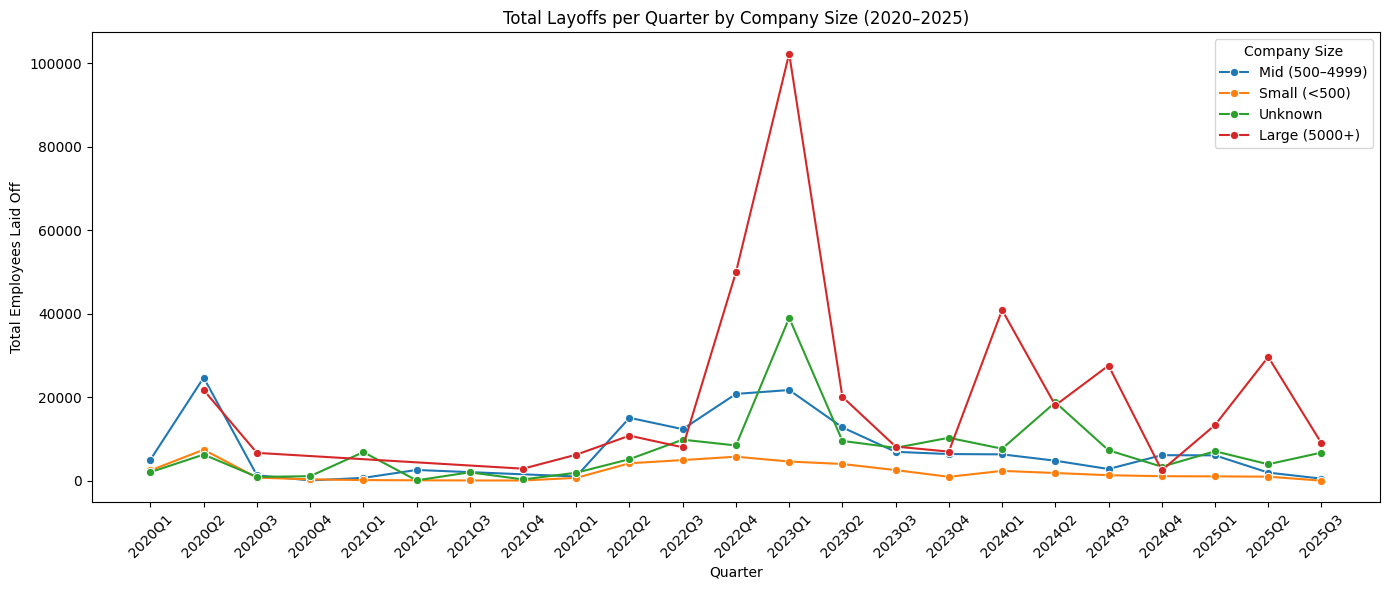

In [22]:
# Ensure 'quarter' and 'company_size_category' columns exist
df['quarter'] = df['date'].dt.to_period('Q')

# Group by both quarter and size category
grouped = (
    df.groupby(['quarter', 'company_size_category'])['total_laid_off']
    .sum()
    .reset_index()
)

# Convert Period to string for plotting
grouped['quarter'] = grouped['quarter'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=grouped,
    x='quarter',
    y='total_laid_off',
    hue='company_size_category',
    marker='o'
)

plt.title("Total Layoffs per Quarter by Company Size (2020–2025)")
plt.xlabel("Quarter")
plt.ylabel("Total Employees Laid Off")
plt.xticks(rotation=45)
plt.legend(title="Company Size")
plt.tight_layout()
plt.show()


<font size = 4><b>Conclusion:</b></font>
- Large companies showed sharp spikes in layoffs, especially during major disruption periods — they consistently accounted for the majority of employees laid off each quarter.
- Mid-sized companies followed a similar pattern but with noticeably smaller peaks and lower overall layoff volumes, which suggests a more cautious or less reactive downsizing approach.
- Small companies maintained a relatively flat trend over time, contributing fewer total layoffs and exhibiting fewer volatility spikes.
- The "Unknown" category fluctuated irregularly and likely reflects inconsistent or incomplete reporting.
- This trend confirms that large companies not only dominate total layoffs, but also react more visibly to economic cycles — possibly due to their scale, media coverage, and investor scrutiny.

<font size = 4><b>7: Layoffs by Company Stage</b></font> — To know what typoe of company laid off the most, if it was a factor.

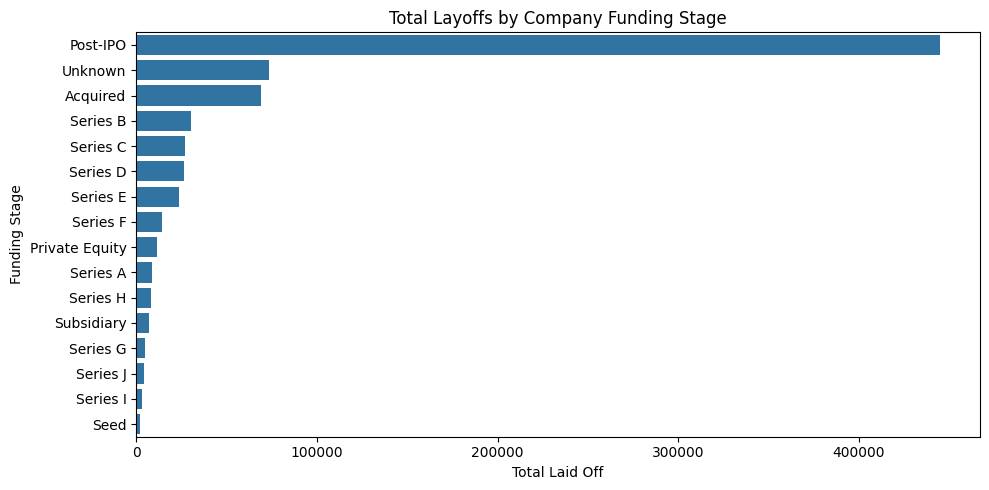

In [23]:
stage_counts = (
    df.groupby('stage')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=stage_counts.values, y=stage_counts.index)
plt.title("Total Layoffs by Company Funding Stage")
plt.xlabel("Total Laid Off")
plt.ylabel("Funding Stage")
plt.tight_layout()
plt.show()


<font size = 4><b>Conclusions:</b></font>
- Post-IPO companies contributed overwhelmingly to total layoffs — accounting for over 400,000 job cuts, far ahead of any other stage.
- The next highest group, “Unknown,” lags far behind (<100,000), highlighting both data incompleteness and the exceptional scale of layoffs at public firms.
- Among named stages, Acquired, Series B, C, D, and E follow in descending order of layoffs — suggesting a trend of mid-to-late stage vulnerability.
- Private equity-backed firms showed relatively minimal layoffs (~20,000), possibly due to leaner operations or less visibility.
- The dominance of layoffs in post-IPO companies likely reflects:
  - larger workforce sizes,
  - public shareholder pressure to cut costs,
  - and over-expansion during 2020–2022 that later needed correction.
- This breakdown shows that layoff behavior is strongly tied to a company's maturity and exposure to market force


<font size = 4><b>8: Top Companies by Layoff Count </b></font> — Reveals a standard of which companies laid off the most over 2020-2025 span, revealing the policies and methodoligies implied by them in relation to employee retention.

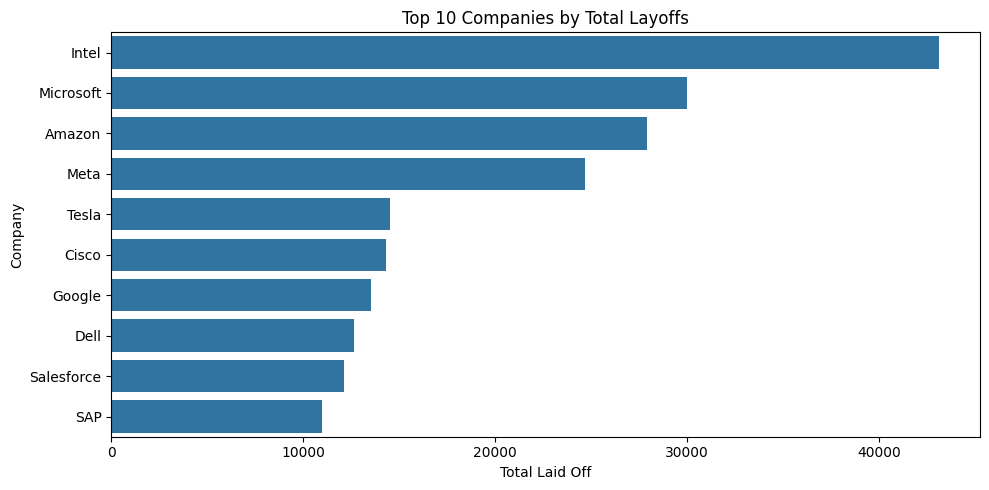

In [24]:
top_companies = (
    df.groupby('company')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title("Top 10 Companies by Total Layoffs")
plt.xlabel("Total Laid Off")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


<font size = 4><b>Conclusions:</b></font>

 **Intel**
- Intel has undergone major restructuring in 2025 under CEO **Lip‑Bu Tan**, cutting up to **20% of its workforce** (~24,000 jobs) to refocus on chip manufacturing competitiveness and AI product lines.:contentReference[oaicite:1]{index=1}
- Financial struggles and shrinking market share versus rivals like AMD and TSMC forced aggressive cost reductions.:contentReference[oaicite:2]{index=2}

**Microsoft**
- Microsoft laid off over **15,000 employees in 2025 alone**, and more than **20,000 since 2022**, amid strategic pivots toward AI infrastructure.:contentReference[oaicite:3]{index=3}
- Despite record profits, leadership opted for workforce cuts to fund its AI-first strategy and streamline operations.:contentReference[oaicite:4]{index=4}

**Amazon**, **Meta**, **Tesla** (similar logic)
- These firms scaled aggressively during pandemic and AI boom, then executed major headcount reductions when growth slowed or costs surged.
- Layoffs often tied to restructuring after acquisitions (e.g. Meta), hardware product shifts, or inefficient expansion (e.g. Tesla gigafactory staffing).



This analysis contextualizes raw layoff numbers — it’s not just about who cut the most, but *why*. These companies reflect broader economic cycles, investor scrutiny, and strategic refocusing in the age of AI.


<font size = 4><b>9: Number of Individual, Large Layoff Events</b></font> — Reveals which company had hte most number of termination events, not necessarily the most terminations.

This reveals volatality, poor planning, and recurring downsizing fo workforce.

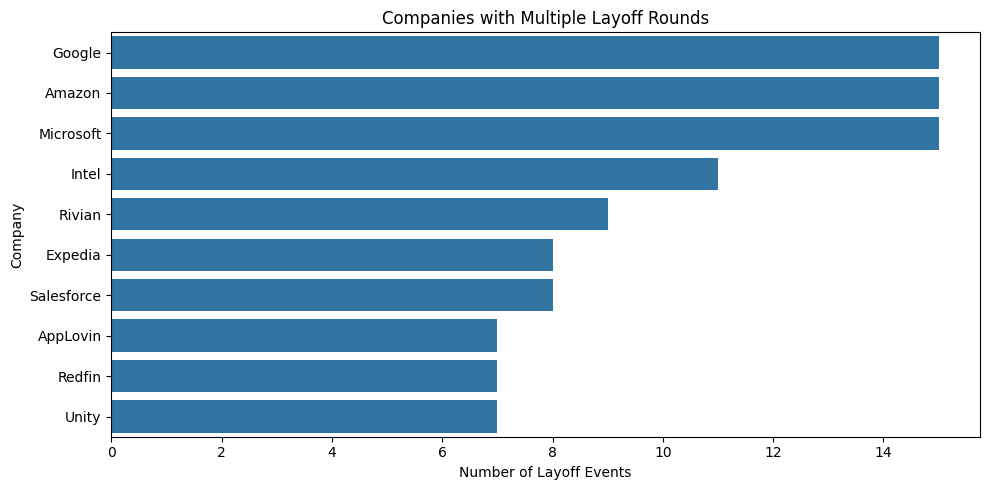

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=repeat_layoff_companies.head(10).values,
    y=repeat_layoff_companies.head(10).index
)
plt.title("Companies with Multiple Layoff Rounds")
plt.xlabel("Number of Layoff Events")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


<font size = 4><b>Conclusions:</b></font>
- Google, Meta, and Amazon each reported more than 14 distinct layoff events from 2020 to 2025 — the highest among all companies in the dataset.
- These repeated rounds suggest prolonged strategic recalibrations, possibly driven by:
  - overexpansion during the tech boom (2020–2021),
  - economic tightening (2022–2023), and
  - ongoing restructuring toward AI and cloud initiatives.
- Frequent layoffs may also reflect phased cuts (e.g., per department, region) or changing forecasts as macroeconomic conditions evolved.
- While these companies have the scale to absorb such volatility, the data highlights the instability even large, resource-rich firms faced during this period.

<font size = 4><b>10: Industry-wise Layoffs Over Time (Quarterly Distribution)</b></font> — To know if financial or sector specific causes caused any disruptions or affects on layoffs? If yes, then how much? 

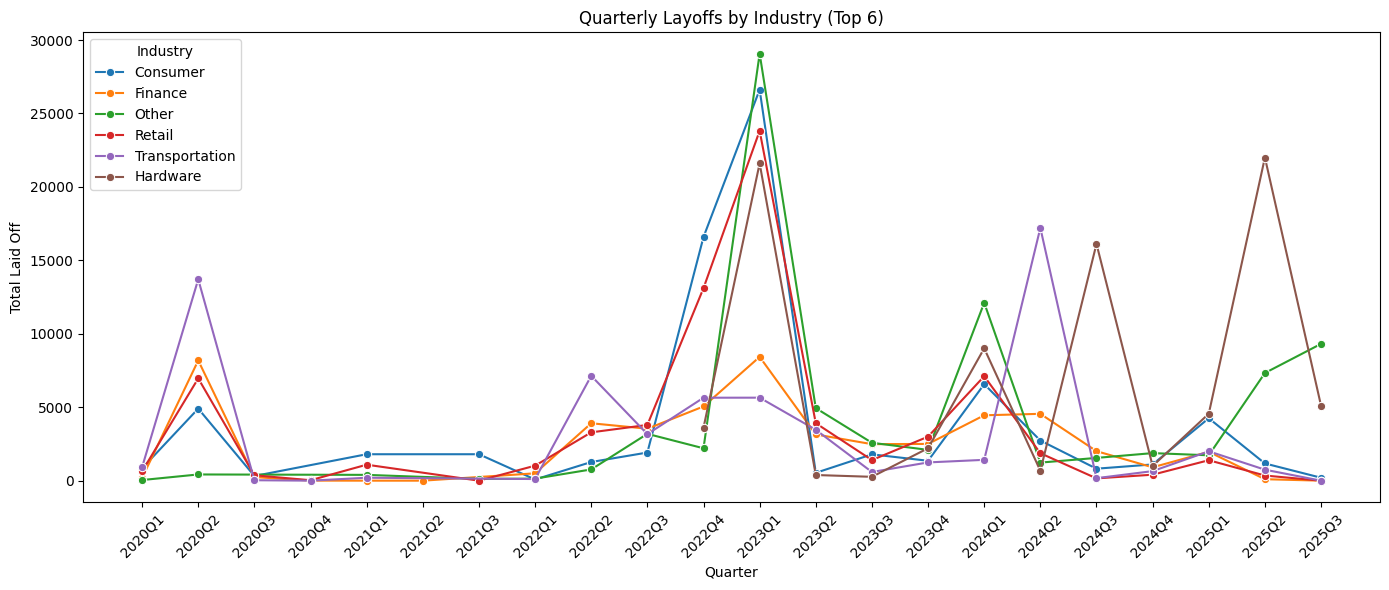

In [30]:
# Group total layoffs by quarter and industry
industry_time = (
    df.groupby(['quarter', 'industry'])['total_laid_off']
    .sum()
    .reset_index()
)

# Optional: keep top N industries to reduce clutter
top_industries = (
    df.groupby('industry')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
    .head(6)
    .index
)

filtered = industry_time[industry_time['industry'].isin(top_industries)].copy()
filtered['quarter'] = filtered['quarter'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=filtered,
    x='quarter',
    y='total_laid_off',
    hue='industry',
    marker='o'
)
plt.title("Quarterly Layoffs by Industry (Top 6)")
plt.xlabel("Quarter")
plt.ylabel("Total Laid Off")
plt.xticks(rotation=45)
plt.legend(title="Industry")
plt.tight_layout()
plt.show()


<font size = 4><b>Conclusion:</b></font>

- In 2023, nearly all major sectors experienced simultaneous layoff spikes — indicating a broad, ecosystem-wide correction in the tech and startup landscape.
- Post-2023, however, the layoff trend diverged sharply:
  - Transportation and Hardware sectors saw renewed and sharp spikes, particularly in 2024 Q3 and again in 2025 Q2 — possibly due to hardware supply chain disruptions, EV slowdowns, or robotics overinvestment.
  - Consumer, Fintech, and Healthcare sectors remained comparatively stable, showing flatter curves with fewer major spikes.
- This suggests that while the initial wave of layoffs was macro-driven, the subsequent rounds became increasingly sector-specific, driven by strategic pivots and industry-specific headwinds.
- Sectoral divergence in late-stage layoffs reflects how funding priorities, adoption rates, and geopolitical pressures began to differentially affect verticals beyond 2023.
---
<font size = 4><b>Additional Conclusion based on Geopolitical Data</b></font>
- The hardware and semiconductor sectors saw renewed layoffs in **2024 Q3** and **2025 Q2**.
- During that same timeframe, tensions between the **U.S. and China** escalated sharply with record-high tariffs (up to 145% on tech hardware imports), accelerating global supply chain disruption.:contentReference[oaicite:3]{index=3}
- Specifically, Intel reported significant restructuring charges in Q3 2024, citing geopolitical trade tensions, macroeconomic uncertainty, and supply-chain volatility as key reasons behind cost-cutting measures.:contentReference[oaicite:4]{index=4}
- In India, a June 2025 survey found **63% of firms** freezing hiring or downsizing due to geopolitical instability—including impact from Middle East conflicts and broader global unrest.:contentReference[oaicite:5]{index=5}

<font size = 3>**Interpretation:**</font>

- The hardware sector’s layoffs in Q3 2024 and Q2 2025 correspond to policy shocks and export control pressures in semiconductor-dependent industries.
- Transportation and hardware firms are more susceptible, as they are directly tied to sensitive supply chains and global trade flows.
- Meanwhile, consumer and service sectors—such as fintech and retail—did not see similar magnitude spikes, likely reflecting their lower exposure to geopolitical supply chain disruption.

---

<font size = 6><u><b>Summary: Contextual Insights from Layoff Trends</b></u></font>



6️⃣ Layoffs by Company Size per Quarter  
- Large companies consistently accounted for the majority of layoffs across all quarters, often spiking during periods of market uncertainty.
- Small and medium companies showed comparatively flatter trends, with occasional bumps likely tied to funding volatility.
- This confirms that large firms — often with bloated headcounts — led downsizing waves during correction periods.

7️⃣ Layoffs by Funding Stage  
- Post-IPO firms were responsible for the majority of layoffs, by a wide margin.
- Late-stage startups (Series C, D, E) also contributed significantly, reflecting struggles with profitability under tightened capital conditions.
- Private equity–backed companies had far fewer layoffs, possibly due to more controlled growth mandates.

8️⃣ Layoffs Over Time by Industry  
- While most industries showed elevated layoffs in 2023, hardware and transportation spiked sharply in 2024 Q3 and 2025 Q2.
- These post-pandemic spikes reflect prolonged disruptions in supply chains, EV pivots, and AI hardware repositioning.
- By contrast, consumer and fintech sectors maintained more stable layoff patterns, indicating relatively stronger demand-side cushioning.

9️⃣ Companies with Repeated Layoffs  
- Meta, Amazon, and Google recorded more than 14 separate layoff events each — suggesting extended restructuring or phased reduction plans.
- High frequency of layoff rounds is often a signal of reactive workforce planning, and possibly internal misalignment.
- Companies with 3+ events in under 18 months raise red flags for instability and forecasting issues.

🔟 Company-Specific Layoff Contexts  
- Intel led all firms in total layoffs, citing strategic restructuring and competitive lag.
- Microsoft’s cuts, despite high revenue, reflected strategic pivots toward AI infrastructure.
- Across the board, layoffs at big tech firms were less about survival and more about operational refocusing and shareholder signaling.

---

<font size = 6><u><b>C: Advanced Diagnostic Insights</b></u></font>

While earlier sections helped us understand the scale, timing, and structural context of layoffs across industries and company types, the following analyses dive deeper into strategic and operational inefficiencies. These advanced metrics are designed to uncover how well-funded companies managed their resources, how volatile their layoff timelines were, and which sectors experienced the most catastrophic staff reductions.

The goal here is not just to count layoffs, but to measure how companies performed relative to their size, funding, and behavior — offering a clearer viewpoint into decision-making quality and business resilience.

<font size = 4><b>11: Layoff Efficiency Score</b></font> — This compound metric highlights companies that were most "inefficient" in how they used their funding. Firms that raised significant capital and still laid off large portions of staff.

C:\Users\tusha\AppData\Local\Temp\ipykernel_69496\3885902087.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


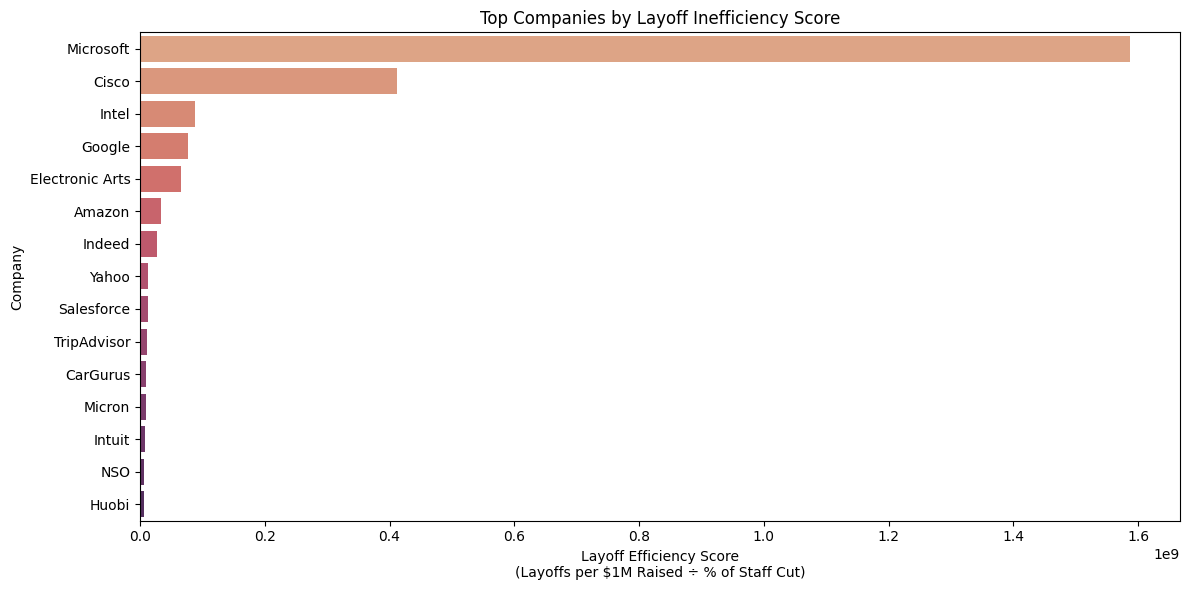

In [35]:
df_eff = df[
    df['total_laid_off'].notna() &
    df['percentage_laid_off'].notna() &
    df['funds_raised_clean'].notna() &
    (df['percentage_laid_off'] > 0) &
    (df['funds_raised_clean'] > 0)
].copy()

df_eff['layoffs_per_million'] = df_eff['total_laid_off'] / (df_eff['funds_raised_clean'] / 1_000_000)
df_eff['layoff_efficiency_score'] = df_eff['layoffs_per_million'] / df_eff['percentage_laid_off']

inefficient = (
    df_eff.groupby('company')
    .agg({
        'total_laid_off': 'sum',
        'percentage_laid_off': 'mean',
        'funds_raised_clean': 'sum',
        'layoffs_per_million': 'mean',
        'layoff_efficiency_score': 'mean'
    })
    .sort_values(by='layoff_efficiency_score', ascending=False)
    .head(15)
).reset_index()


top_inefficient = inefficient.sort_values(by='layoff_efficiency_score', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_inefficient,
    x='layoff_efficiency_score',
    y='company',
    palette='flare'
)
plt.title("Top Companies by Layoff Inefficiency Score")
plt.xlabel("Layoff Efficiency Score\n(Layoffs per $1M Raised ÷ % of Staff Cut)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

<font size = 4><b>Conclusions:</b></font>

- Microsoft and Cisco top the chart — but the extreme height is likely due to incomplete fundraising data (e.g. only $4M–6M raised being reported). These outliers are best viewed cautiously.

- From Intel onward, the values stabilize — indicating more interpretable inefficiencies: large-scale layoffs despite high fundraising.

- This plot powerfully shows how some firms were capital-heavy and still resorted to major staff cuts.